# SME0878 - Mineração Estatística de Dados

## Projeto 4 - Clustering

### Alunos
- Alexandre Batistellas Bellas&emsp;&emsp;&emsp;&nbsp;&emsp;9763168
- Juan Carlos Elias Obando Valdivia&emsp;&nbsp;7487156

## 1 - Considere os dados gerados pelo enunciado.

## Usando o método means, determine o número ideal de sementes (Elbow Method) para noise=0.1, 0.2 e 0.5.

<Figure size 1080x720 with 0 Axes>

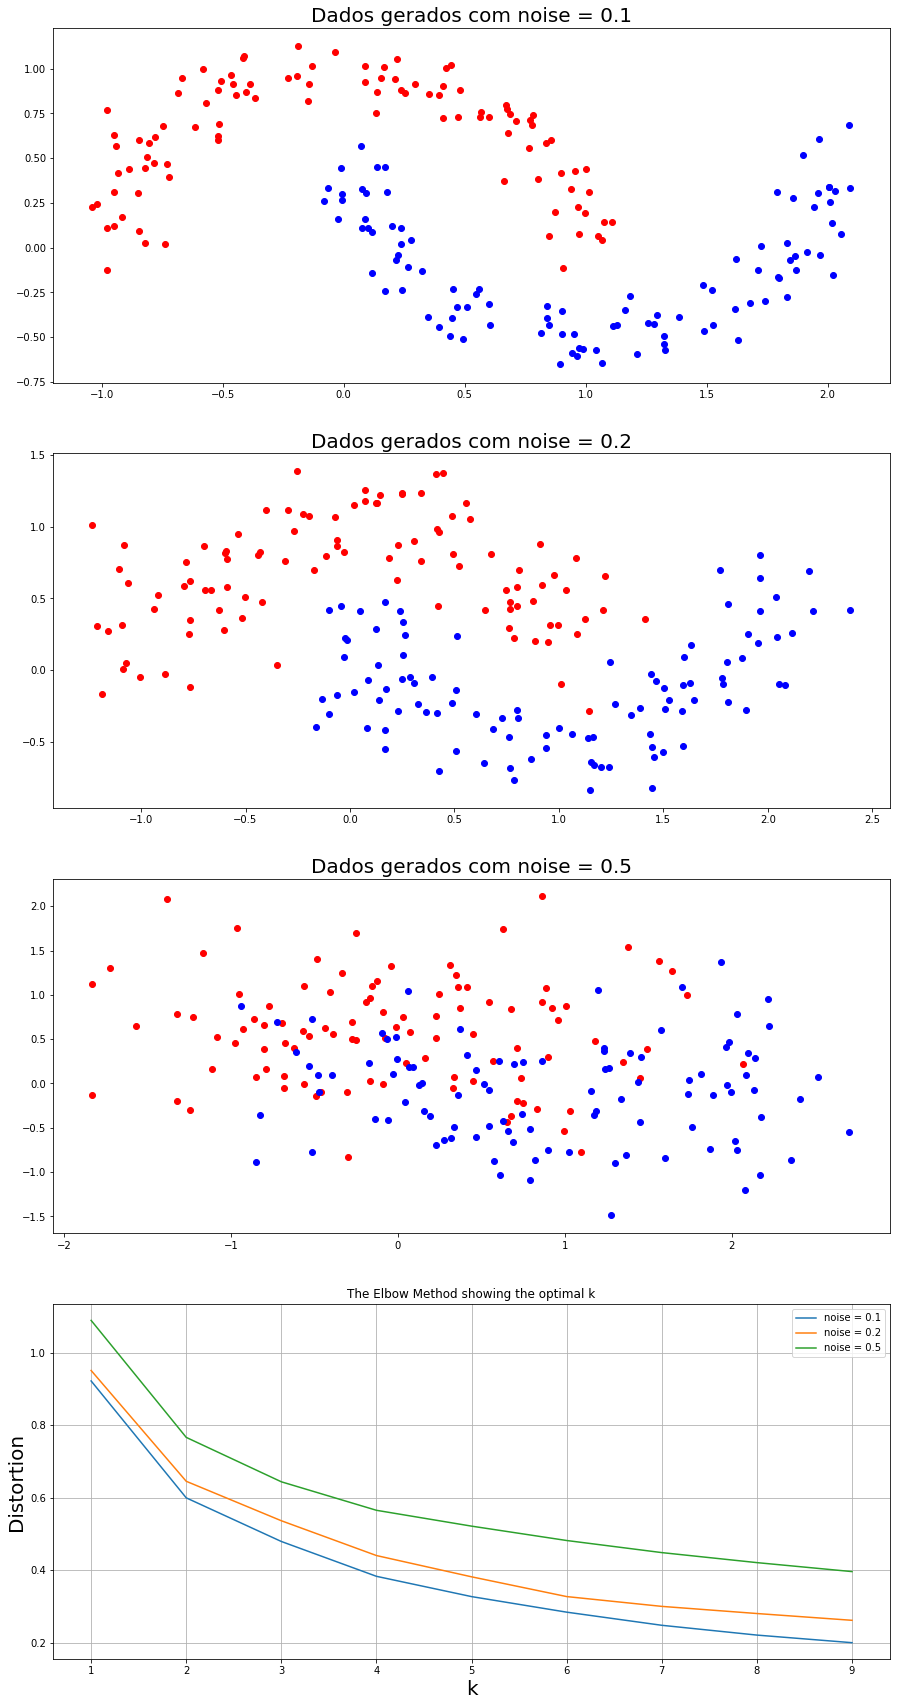

In [1]:
import sklearn.datasets as skdata
from matplotlib import pyplot
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
%matplotlib inline

plt.figure(figsize=(15,10))

fig, axs = plt.subplots(4, 1, figsize=(15,30))

#Gerando dados para agrupamento
#Shift+O expande os gráficos plotados
for i, noise in zip(range(3), [0.1, 0.2, 0.5]):
    n_samples = 200
    X, y = skdata.make_moons(n_samples=n_samples, noise=noise)

    d = np.column_stack((X,np.transpose(y)))
    data = pd.DataFrame(data = d, columns=['X1', 'X2', 'y'])
    
    features_names = ['X1', 'X2']
    class_labels = np.unique(y)
    
    #Plotando os dados gerados
    colors = ['red', 'blue', 'green', 'black']
    aux = 0
    for c in class_labels:
        ind = np.where(y == c)
        axs[i].scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
        axs[i].set_title("Dados gerados com noise = %s" % noise, fontsize=20)
        aux = aux + 1
    
    #Agrupando com KMeans
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
        distortions.append(np.average(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)))
    
    #Plotando elbow method em função de k
    axs[3].plot(K, distortions, label='noise = %s' % noise)
    axs[3].set_xlabel('k', fontsize=20)
    axs[3].set_ylabel('Distortion', fontsize=20)
    axs[3].legend(loc='best')
    axs[3].grid(True)
    axs[3].set_title('The Elbow Method showing the optimal k')
    
plt.show(True)

Para todos os valores de ruído, o k ideal é 1.

##  2 - Construa um gráfico da medida silhouette_score em função do nível de ruído noise. Considere os métodos k-means e spectral clustering.

In [2]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering

noise = []
silhouette_kmeans = []
silhouette_spectral = []
n_samples = 200

#Obtendo os silhouette scores
for i in np.arange(0, 1, 0.1):
    noise.append(i)
    
    #Gerando dados
    X, y = skdata.make_moons(n_samples=n_samples, noise=i)

    d = np.column_stack((X,np.transpose(y)))
    data = pd.DataFrame(data = d, columns=['X1', 'X2', 'y'])
    features_names = ['X1', 'X2']
    class_labels = np.unique(y)
    
    #KMeans
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(X)
    y_km = kmeans.fit_predict(X)

    labels = kmeans.labels_
    silhouette_kmeans.append(silhouette_score(X, labels, metric='euclidean'))
    
    #Spectral Clustering
    spc = SpectralClustering(n_clusters=2, assign_labels="discretize", random_state=0).fit(X)
    y_spc = spc.fit_predict(X)
    labels2 = spc.labels_
    silhouette_spectral.append(silhouette_score(X, labels2, metric='euclidean'))

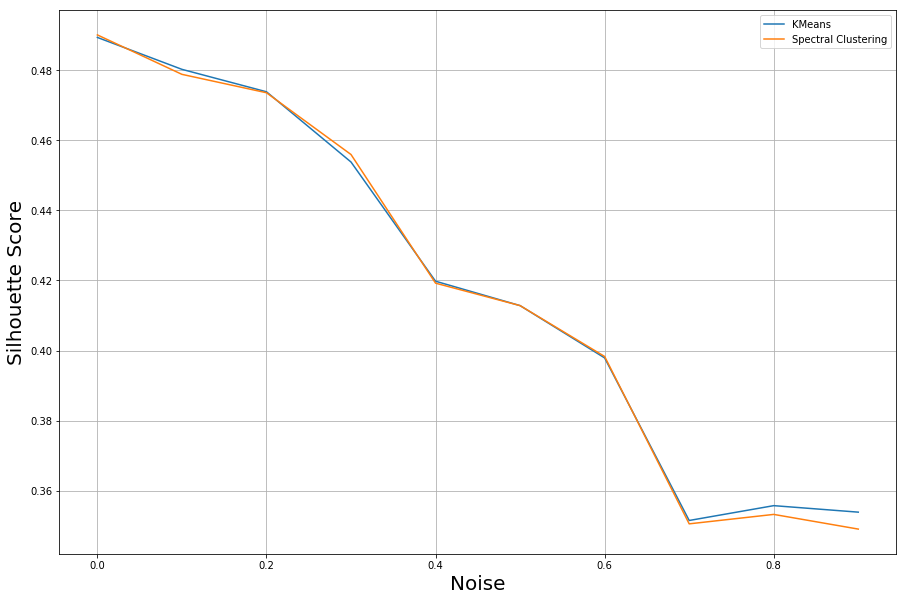

In [3]:
#Plotando gráfico
plt.figure(figsize=(15,10))
plt.xlabel("Noise", fontsize=20)
plt.ylabel("Silhouette Score", fontsize=20)
plt.plot(noise, silhouette_kmeans, label='KMeans')
plt.plot(noise, silhouette_spectral, label='Spectral Clustering')
plt.legend(loc='best')
plt.grid(True)
plt.show(True)

## 3 - Para o método DBSCAN, varie os valores eps e min_samples para obter o máximo da medida silhouette_score. Grafique os resultados para os melhores valores encontrados.

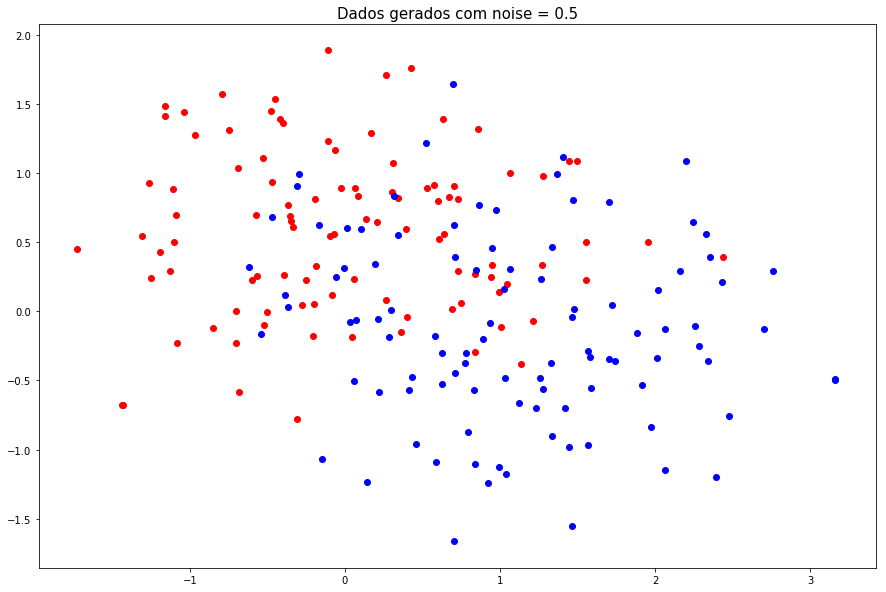

In [4]:
#Gerando dados com noise fixo de 0.5
n_samples = 200
X, y = skdata.make_moons(n_samples=n_samples, noise=0.5)

d = np.column_stack((X,np.transpose(y)))
data = pd.DataFrame(data = d, columns=['X1', 'X2', 'y'])

features_names = ['X1', 'X2']
class_labels = np.unique(y)

#Plotando os dados gerados
plt.figure(figsize=(15,10))
colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    plt.title("Dados gerados com noise = 0.5", fontsize=15)
    aux = aux + 1

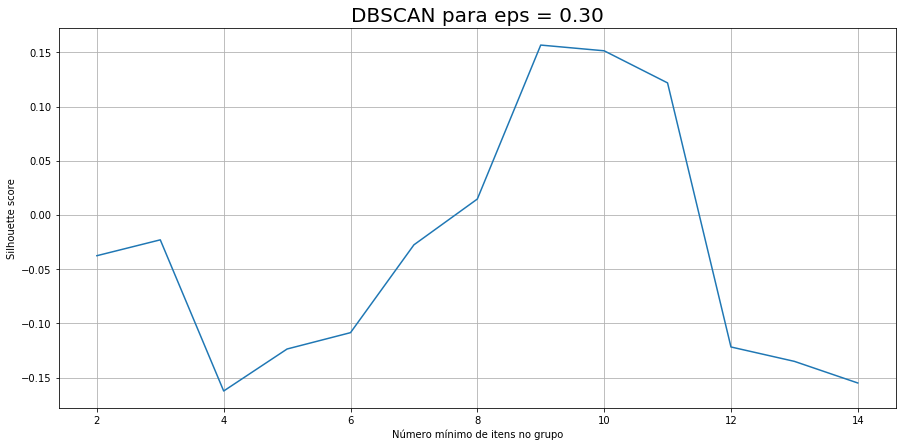

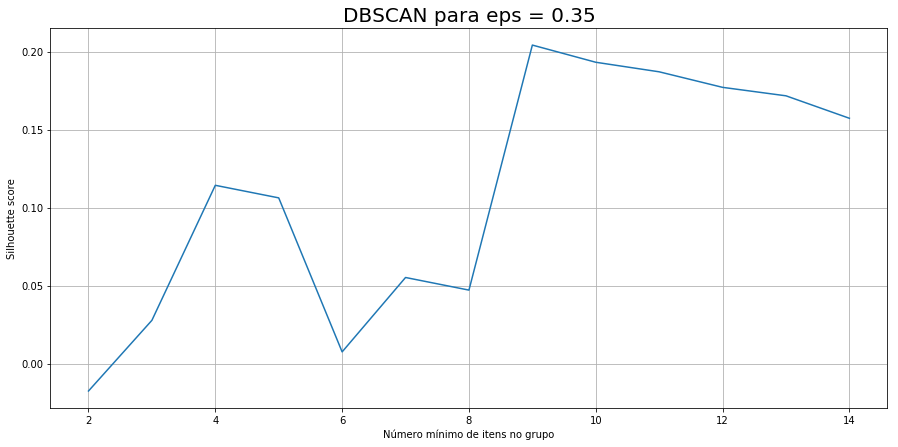

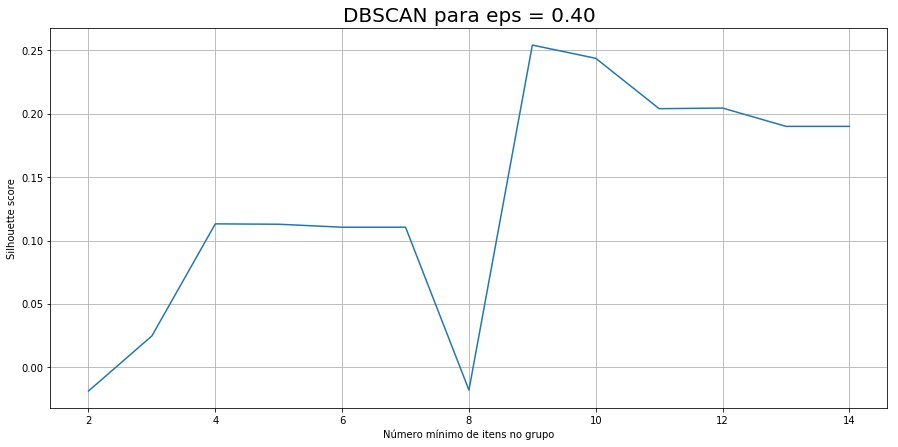

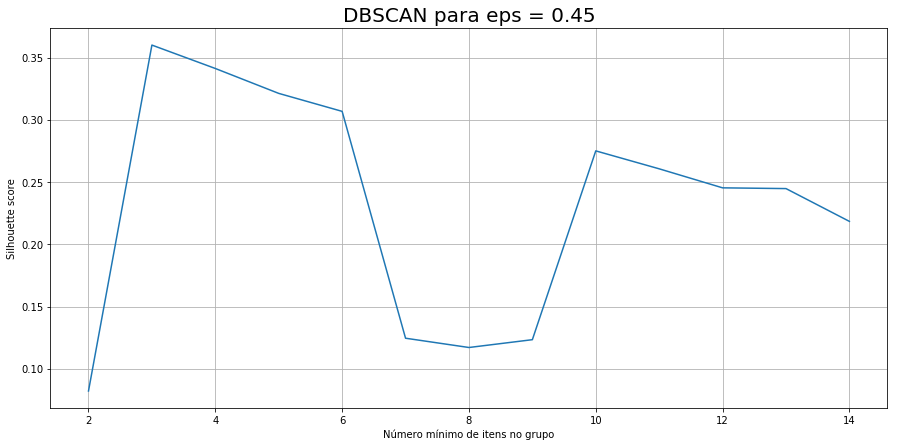

In [5]:
#Aplicando DBSCAN
from sklearn.cluster import DBSCAN

#Para eps = 0.1, não temos discriminação de grupos.
for i, eps in zip(range(8), np.arange(0.1, 2, 0.05)): 
    samples = []
    score = []
    
    for min_samples in np.arange(2, 15):
        samples.append(min_samples)
        
        dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        y_db = dbscan.fit_predict(X)
        
        labels = dbscan.labels_
        #print(labels)
        if len(np.unique(labels)) > 1:
            score.append(silhouette_score(X, labels, metric='euclidean'))
    
    if len(score) == len(samples):
        plt.figure(figsize=(15,7))
        plt.plot(samples, score)
        plt.xlabel("Número mínimo de itens no grupo")
        plt.ylabel("Silhouette score")
        plt.title("DBSCAN para eps = %.2f" % eps, fontsize=20)
        plt.grid(True)
        plt.show(True)

Obtemos um valor máximo de Silhouette score para DBSCAN com eps igual a 0.45, número de itens por grupo igual a 3.

## 4 - Considere os dados da Iris. Construa os dendrogramas usando Agglomerative Hierarchical Clustering com os métodos average linkage, Ward e Complete Linkage. Encontre o melhor valor de k e mostre os dados projetados usando PCA e os clusters obtidos.

In [6]:
import random
random.seed(1)
# Pandas is used for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#CSV file
df = pd.read_csv("data/iris.csv")
print("Tamanho do dataset:", df.shape)
df.head(10)

Tamanho do dataset: (150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
#Tirando linhas duplicadas e NaN
df = df.drop_duplicates()
df = df.replace('?', np.nan)
df = df.dropna()
print("Novo tamanho:", df.shape)

Novo tamanho: (147, 5)


In [8]:
#Classes do dataset
classes = pd.unique(df[df.columns[-1]])
classes = np.array(classes, dtype=str)

print("Classes únicas no conjunto de dados:\n", classes)
list_labels = list(df.columns)

print("\nNomes dos atributos e classe:\n",list_labels)

Classes únicas no conjunto de dados:
 ['setosa' 'versicolor' 'virginica']

Nomes dos atributos e classe:
 ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [9]:
#Variável Y => classes de base para a classificação
Y = np.array(df[list_labels[-1]], dtype=str)

#Removendo os labels do features
df_x = df.drop(list_labels[-1], axis = 1)

#Variável X => convertendo o features para numpy array
X = np.array(df_x)

In [10]:
#Bibliotecas necessárias
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

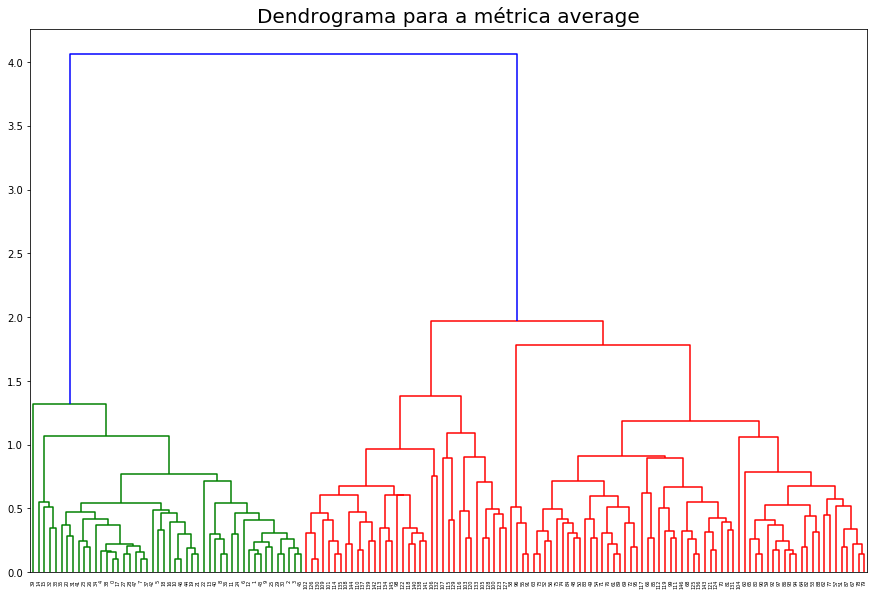

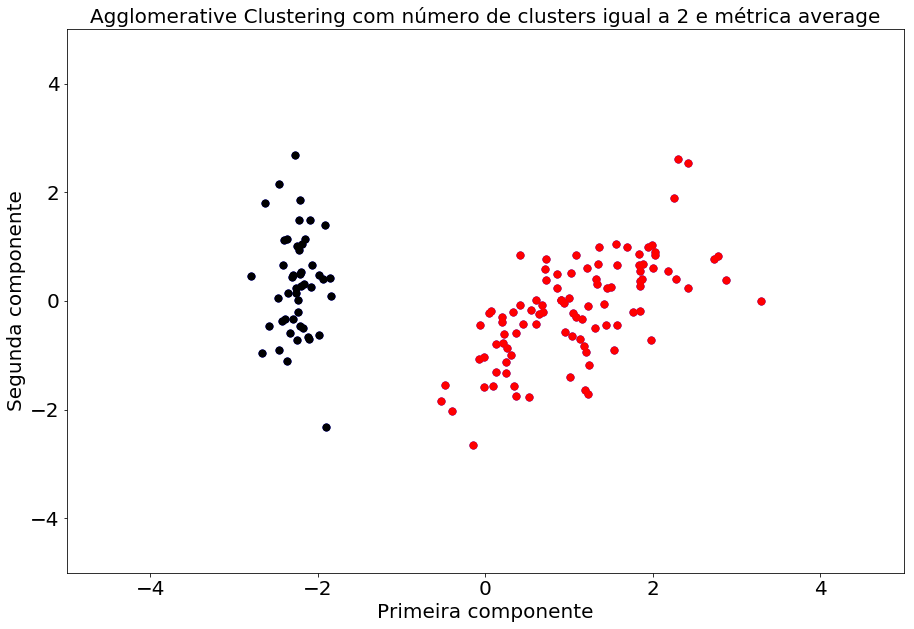

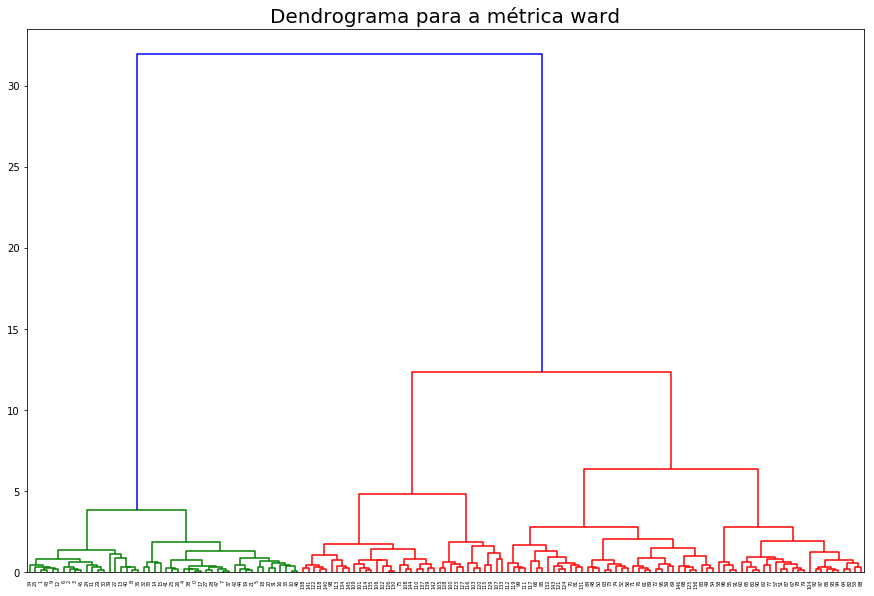

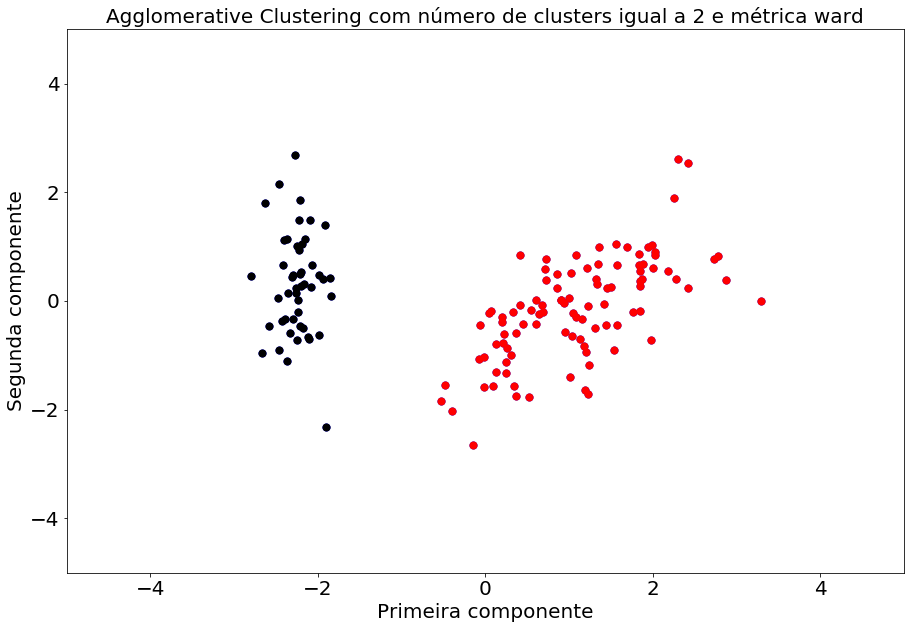

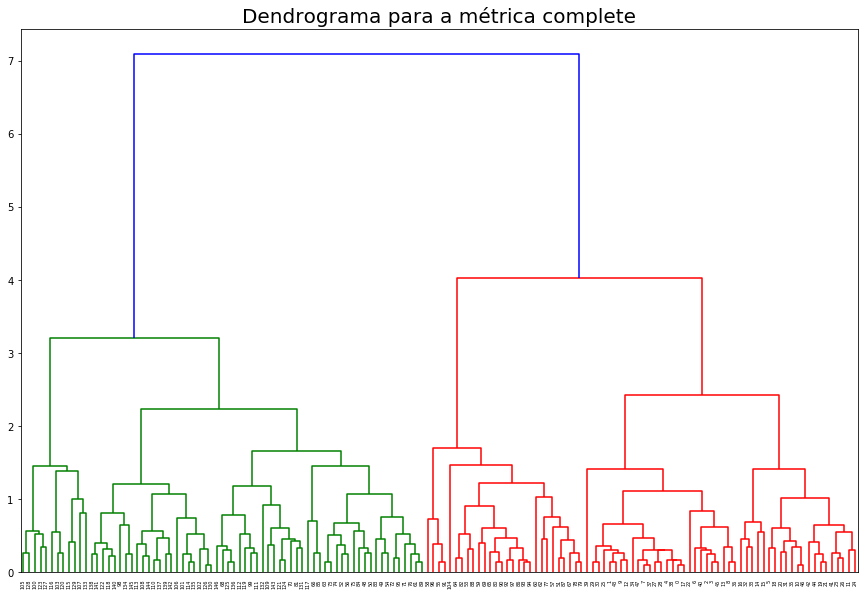

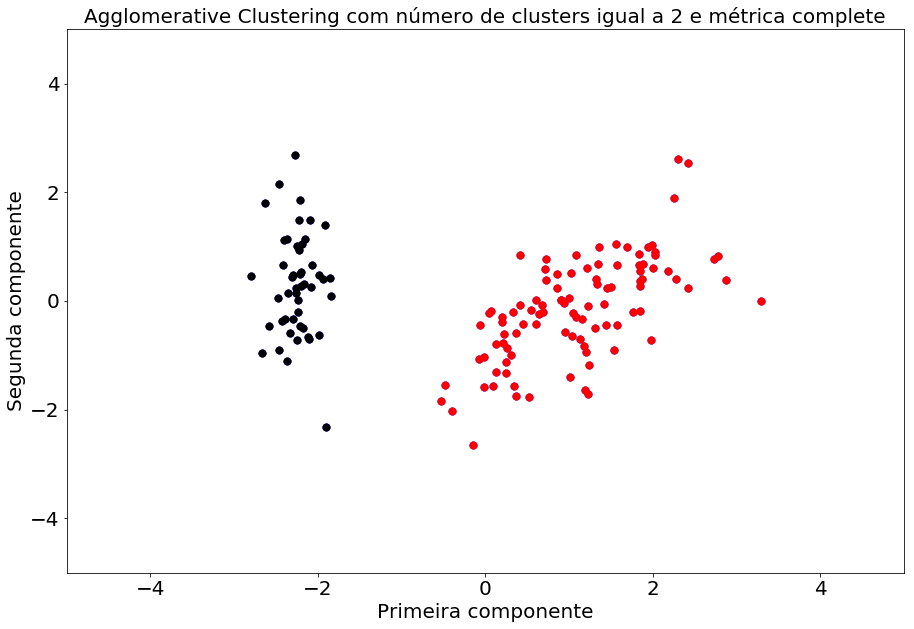

In [11]:
#Obtendo melhor clusterização
methods = ['average', 'ward', 'complete']

max_score = 0
best_model = {}

for method in methods:
    #Criando dendrograma
    plt.figure(figsize=(15,10))
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrograma para a métrica %s" % method, fontsize=20)
    plt.show(True)
    
    #Executando Agglomerative Clustering
    for n_clusters in np.arange(2,10,1):
        hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage=method)
        y_hc = hc.fit_predict(X)
        
        #Calculando silhouette score para obter o melhor modelo
        score = silhouette_score(X, y_hc, metric='euclidean')
        
        #Se é o melhor modelo, salva-o
        if score > max_score:
            max_score = score
            best_model = {'model': hc, 'labels': y_hc, 'n_clusters': n_clusters}
    
    #Plotando o scatter plot dos pontos da melhor divisão
    y_hc = best_model['labels']
    
    #Padronizando os dados a serem plotados
    scaler = StandardScaler().fit(X)
    X_padr = scaler.transform(X)
    
    #Aplicando PCA para duas componentes => scatter plot
    pca_result = PCA(n_components=2).fit_transform(X_padr)
    
    plt.figure(figsize=(15,10))
    plt.scatter(pca_result[:,0], pca_result[:,1], s=50, color = 'blue')
    
    #Tem-se tantos scatter plots por conta da possibilidade de termos o agrupamento por 10 clusters
    plt.scatter(pca_result[y_hc == 0,0], pca_result[y_hc == 0,1], s=50, c='red')
    plt.scatter(pca_result[y_hc == 1,0], pca_result[y_hc == 1,1], s=50, c='black')
    plt.scatter(pca_result[y_hc == 2,0], pca_result[y_hc == 2,1], s=50, c='blue')
    plt.scatter(pca_result[y_hc == 3,0], pca_result[y_hc == 3,1], s=50, c='cyan')
    plt.scatter(pca_result[y_hc == 4,0], pca_result[y_hc == 4,1], s=50, c='green')
    plt.scatter(pca_result[y_hc == 5,0], pca_result[y_hc == 5,1], s=50, c='magenta')
    plt.scatter(pca_result[y_hc == 6,0], pca_result[y_hc == 6,1], s=50, c='yellow')
    plt.scatter(pca_result[y_hc == 7,0], pca_result[y_hc == 7,1], s=50, c='#FF8C00') #Laranja
    plt.scatter(pca_result[y_hc == 8,0], pca_result[y_hc == 8,1], s=50, c='#FFC0CB') #Rosa
    plt.scatter(pca_result[y_hc == 9,0], pca_result[y_hc == 9,1], s=50, c='#800080') #Roxo
    
    plt.title("Agglomerative Clustering com número de clusters igual a %d e métrica %s" 
              % (best_model['n_clusters'], method), fontsize=20)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    
    plt.xlabel("Primeira componente", fontsize=20)
    plt.ylabel("Segunda componente", fontsize=20)
    plt.xticks(color='k', size=20)
    plt.yticks(color='k', size=20)
    plt.show(True)

### 5- Compare os métodos de clustering para os dados da iris usando a medida normalize mutual information (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html).

In [12]:
#Função para substituição de um padrão de valores por outro padrão
def mudaValoresCorrespondentes(data, atributo, dict_replace):
    data[atributo] = data[atributo].replace(dict_replace)

In [13]:
#Substituindo atributos verbosos por atributos numéricos
#Permite a comparação do desempenho de cada método de clusterização
atribs = [
    'species'
]
subst = [
    {'setosa': 1, 'versicolor': 2, 'virginica': 3}
]

for i, j in zip(atribs, subst):
    mudaValoresCorrespondentes(df, i, j)

In [14]:
Y = np.array(df[df.columns[-1]])

In [15]:
from sklearn.metrics import normalized_mutual_info_score

print("==== Comparação entre métodos de clusterização ====")

#O número de clusters para cada modelo deverá ser 3 (número de classes do dataset)
#KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_
score = normalized_mutual_info_score(Y, labels, average_method='arithmetic')
print("\nKMeans: %.4f\n" % score)

print("===================================\n")

#Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
score = normalized_mutual_info_score(Y, y_hc, average_method='arithmetic')
print("Agglomerative Clustering: %.4f\n" % score)

print("===================================\n")

#DBSCAN
dbscan = DBSCAN(eps=0.45, min_samples=3).fit(X)
y_db = dbscan.fit_predict(X)
labels = dbscan.labels_
score = normalized_mutual_info_score(Y, labels, average_method='arithmetic')
print("DBSCAN: %.4f\n" % score)

print("===================================\n")

#Spectral Clustering
spc = SpectralClustering(n_clusters=3, assign_labels="discretize", random_state=0).fit(X)
y_spc = spc.fit_predict(X)
labels = spc.labels_
score = normalized_mutual_info_score(Y, labels, average_method='arithmetic')
print("Spectral Clustering: %.4f" % score)

==== Comparação entre métodos de clusterização ====

KMeans: 0.7621


Agglomerative Clustering: 0.7740


DBSCAN: 0.5826


Spectral Clustering: 0.7706


Vemos que o Agglomerative Clustering possui melhor desempenho.